Efficient Weighted Probabilistic Frequent Itemset Mining in Uncertain Databases

I. Libraries

In [5]:
import os
import time
import random
import matplotlib.pyplot as plt

# These libraries are used exclusively for testing and will not affect the results of the algorithms.

II. My Libraries

1. itertools.combinations()

In [2]:
def combinations(input_list, r):
    """
    Generate all combinations of size r from the input list.

    This function uses an iterative approach to generate all possible combinations
    of the specified size 'r' from the given 'input_list'. It is a generator function
    that yields one combination at a time, making it memory-efficient for large lists.

    Args:
    - input_list (list): The input list from which combinations are to be generated.
    - r (int): The size of each combination.

    Yields:
    - combination (list): The next combination of size r.
    """

    # Calculate the length of the input list.
    n = len(input_list)

    # Initialize a list of indices to track the elements of each combination.
    indices = list(range(r))

    # If the requested combination size is larger than the list, return nothing.
    if r > n:
        return

    # Yield the first combination based on the initial indices.
    yield [input_list[i] for i in indices]

    # Use a while loop to generate all possible combinations.
    while True:
        # Find the rightmost index that can be incremented.
        for i in reversed(range(r)):
            if indices[i] != i + n - r:
                break
        else:
            # If no such index exists, all combinations have been generated.
            return

        # Increment the current index and adjust subsequent indices.
        indices[i] += 1
        for j in range(i + 1, r):
            indices[j] = indices[j - 1] + 1

        # Yield the next combination based on the updated indices.
        yield [input_list[i] for i in indices]

2. itertools.chain.from_iterable()

In [3]:
def chain_from_iterable(iterables):
    """
    Chain from an iterable of iterables.

    This function iterates over each iterable within the provided 'iterables', 
    and then iterates over each element within these nested iterables. 
    It yields each element in sequence, effectively flattening the iterable 
    of iterables by one level.

    Args:
    - iterables (iterable of iterables): An iterable where each element is an iterable.
        Examples of 'iterables' include a list of lists, a tuple of tuples, etc.

    Yields:
    - element: The next element in the chain. Each 'element' is an individual item 
      from one of the nested iterables.
    """

    # Iterate over each nested iterable in the given iterable of iterables.
    for it in iterables:
        # Iterate over each element in the current nested iterable.
        for element in it:
            # Yield the current element, thus 'flattening' the structure.
            yield element

3. math.factorial()

In [4]:
def factorial(x):
    """
    Calculate the factorial of x using an iterative approach.

    This function computes the factorial of a number 'x' iteratively. The factorial
    of a number 'n' is defined as the product of all positive integers less than or 
    equal to 'n'. For example, factorial(5) is 5*4*3*2*1 = 120.

    Args:
    - x (int): The number for which the factorial is to be calculated. It should be 
      a non-negative integer, as the factorial is not defined for negative numbers.

    Returns:
    - int: The factorial of 'x'.
    """

    # Initialize the result to 1, since factorial is a product and 
    # the identity for multiplication is 1.
    result = 1

    # Use a for loop to multiply the result by each number from 1 to x.
    for i in range(1, x + 1):
        result *= i

    # Return the computed factorial.
    return result

4. math.exp() but for negative lambda only

In [5]:
def exp_negative_lambda(lmbda):
    """
    Calculate the value of e^(-lambda) using a series expansion.

    This function uses the Taylor series expansion for e^(-lambda). The series 
    expansion for e^x is given by the sum of x^i / i!, for i from 0 to infinity.
    In this case, x is replaced with -lambda, leading to the series for e^(-lambda).

    Args:
    - lmbda (float): The lambda value in e^(-lambda). Can be any real number.

    Returns:
    - float: The calculated value of e^(-lambda).

    Note:
    A fixed number of terms (20) is used in the series expansion to ensure reasonable 
    accuracy while maintaining computational efficiency. This number can be adjusted 
    for higher accuracy or faster computation.
    """

    # Number of terms in the series expansion for reasonable accuracy
    n = 20  

    # Calculate e^(-lambda) using the series expansion
    # sum((-lmbda)**i / factorial(i) for i in range(n))
    # This loop calculates each term of the series (-lambda)^i / i! and sums them up
    e_neg_lambda = sum((-lmbda)**i / factorial(i) for i in range(n))

    # Return the computed value
    return e_neg_lambda

5. scipy.stats.poisson.cdf()

The Poisson CDF at a point $k$ for a given mean λ is the sum of probabilities of observing from 0 up to $k$ occurrences, which can be calculated using the Poisson probability mass function (PMF).

The Poisson PMF for observing exactly $x$ events when the average number of events is λ is given by:

$P(X=x)=\frac{e^{-λ}λ^x}{x!}$

In [6]:
def poisson_pmf(lmbda, x):
    """
    Calculate the Poisson probability mass function for x events and average rate lmbda.

    The Poisson PMF calculates the probability of observing 'x' events in a fixed
    interval of time or space, given that these events occur with a known average rate 'lmbda'
    and independently of the time since the last event.

    Args:
    - lmbda (float): The average rate of occurrence of the event.
    - x (int): The number of occurrences for which the probability is calculated.

    Returns:
    - float: The probability of observing 'x' events.
    """

    # Calculate the probability using the formula for the Poisson PMF:
    # P(X = x) = (lambda^x * e^(-lambda)) / x!
    prob = (lmbda**x) * (exp_negative_lambda(lmbda)) / factorial(x)

    return prob

The CDF is then the sum of these probabilities from $x=0$ to $x=k$:

$F(X\leq k)=\sum_{x=0}^{k}\frac{e^{-λ}λ^x}{x!}$

In [7]:
def poisson_cdf(lmbda, k):
    """
    Calculate the cumulative distribution function of the Poisson distribution.

    The Poisson CDF calculates the probability of observing 'k' or fewer events in a 
    fixed interval of time or space. It sums up the probabilities for all events from 0 to 'k'.

    Args:
    - lmbda (float): The average rate of occurrence of the event.
    - k (int or float): The upper limit of occurrences for which the cumulative probability is calculated.
      If 'k' is not an integer, it is converted to an integer as the CDF is defined only for integer values.

    Returns:
    - float: The cumulative probability of observing up to 'k' events.
    """

    # Ensure k is an integer for the range function
    k = int(k)

    # Calculate the CDF value by summing up the PMF values from 0 to k
    cdf_value = sum(poisson_pmf(lmbda, i) for i in range(k + 1))

    return cdf_value

6. math.sqrt()

In [8]:
def sqrt(number, tolerance=1e-10):
    """
    Calculate the square root of a number using Newton's method.

    Newton's method is an iterative technique for finding successively better 
    approximations to the roots of a real-valued function. This implementation 
    applies Newton's method to find the square root of a given number.

    Args:
    - number (float): The number to find the square root of. Must be non-negative.
    - tolerance (float): The precision of the result. The iteration stops when 
      the difference between successive approximations is less than this value.

    Returns:
    - float: The square root of the number.

    Raises:
    - ValueError: If the input number is negative, as square root is not 
      defined for negative numbers.
    """

    # Check for negative input, which is not valid in this context.
    if number < 0:
        raise ValueError("Cannot compute the square root of a negative number.")

    # The square root of 0 and 1 is the number itself.
    if number == 0 or number == 1:
        return number

    # Initial guess for the square root, typically number / 2.0.
    guess = number / 2.0

    # Iterate until the absolute difference between guess^2 and number is within the tolerance.
    while abs(guess * guess - number) > tolerance:
        # Update the guess using the formula: guess = (guess + number / guess) / 2.0.
        guess = (guess + number / guess) / 2.0

    # Return the computed square root.
    return guess

III. Main parts

1. Calculate the probability of each item in a database ($PXi$)

In [9]:
def calculate_p_xi(DB, density):
    """
    Calculates the probability of each item in a database.

    This function computes the frequency of each item in the database and 
    then calculates the probability of each item. The probability of an item 
    is defined as the number of transactions containing the item divided by 
    the total number of transactions in the database. This function is useful 
    in various data mining tasks where understanding the distribution of items 
    in a dataset is essential, such as in market basket analysis.

    Args:
    - DB (list of lists): A database represented as a list of transactions, 
      where each transaction is a list of items.
    - density (float): A threshold for filtering items based on their probability.

    Returns:
    - dict: A dictionary mapping each item to its probability in the database.
    """

    # Initialize a dictionary to store the frequencies of each item
    item_frequencies = {}

    # Iterate over each transaction in the database
    for transaction in DB:
        # Iterate over each item in the transaction
        for item, probability in transaction:
            # If the probability of an item exceeds the density threshold
            if probability > density:
                # Increase the frequency count of that item
                item_frequencies[item] = item_frequencies.get(item, 0) + 1

    # Calculate the probability of each item
    # Probability is calculated as the frequency of the item divided by the total number of transactions
    p_xi = {item: freq / len(DB) for item, freq in item_frequencies.items()}

    return p_xi

2. Calculate probability an itemset $X$ using the Poisson distribution

The mean $(µ)$ of the Poisson binomial distribution is given by:

$μ=\sum_{i=1}^{n}PXi$

where $PXi$ is the probability of the ith item in the itemset $X$ occurring in a transaction.

The variance $(σ²)$ of the Poisson binomial distribution is given by:

$(σ²)=\sum_{i=1}^{n}PXi(1-PXi)$

where $PXi$ is as defined above

The frequentness probability is calculated using the CDF of the Poisson distribution, which is an approximation of the Poisson binomial distribution:

$P(Sup(X)\geq minSup)=1-F(minSup-1,μ)$

In [10]:
def calculate_probability(X, minSup, p_xi):
    """
    Calculate the probability that an itemset X is frequent using the Poisson distribution
    as an approximation to the Poisson binomial distribution.

    The function approximates the probability that the support of an itemset 'X' in a database
    exceeds a minimum support threshold 'minSup'. The Poisson distribution is used as a 
    simplification of the more complex Poisson binomial distribution.

    Args:
    - X (set): The itemset for which to calculate the frequentness probability.
    - minSup (int): The minimum support threshold.
    - p_xi (dict): Dictionary mapping items in X to their probabilities in the database.

    Returns:
    - float: Probability that the itemset X's support exceeds minSup.
    """
    
    # Calculate the mean (mu) for the Poisson binomial distribution
    mu = sum(p_xi.get(item, 0) for item in X)
    
    # Calculate the variance (sigma^2) for the Poisson binomial distribution
    sigma_squared = sum(p_xi.get(item, 0) * (1 - p_xi.get(item, 0)) for item in X)
    
    # If variance is significant, use Poisson distribution to approximate the Poisson binomial distribution
    if sigma_squared > 0:
        # Calculate the probability using the CDF of the Poisson distribution
        frequentness_probability = 1 - poisson_cdf(minSup - 1, mu)
    else:
        # If variance is zero (or very small), treat the distribution as deterministic
        frequentness_probability = 1 if mu >= minSup else 0

    return frequentness_probability


3. Find weighted probabilistic frequent itemsets (wPFI) of size 1

In [11]:
def Scan_Find_Size_1_wPFI(I, DB, w, density, msup, t):
    """
    Scans the database to find weighted probabilistic frequent itemsets (wPFI) of size 1.

    This function examines each item in the database and evaluates its weighted support 
    and the probability of its support being greater than or equal to a minimum support 
    threshold (msup). An item is considered a weighted probabilistic frequent itemset of 
    size 1 if its weighted support multiplied by its estimated probability meets or exceeds 
    a specified threshold (t).

    Args:
    - I (set): A set of all items in the database.
    - DB (list of lists): The database, represented as a list of transactions where each 
      transaction is a list of items.
    - w (dict): A dictionary mapping each item to its weight.
    - density (float): A density threshold for filtering items.
    - msup (float): The minimum support threshold.
    - t (float): The threshold for the weighted probability.

    Returns:
    - set: A set of weighted probabilistic frequent items of size 1.
    - dict: A dictionary mapping each frequent itemset of size 1 to its weighted support.

    Note:
    The function uses a combination of support calculation, weighting, and probability 
    estimation to identify significant single-item itemsets.
    """

    # Initialize a set to store weighted probabilistic frequent items of size 1
    WPFI1 = set()

    # Initialize a dictionary to store the weighted support for each itemset
    mu1 = {}

    # Iterate over each item in the set of all items
    for item in I:
        # Create a frozenset for the current item
        itemset = frozenset([item])

        # Calculate the weighted support for the single-item itemset
        weighted_support = sum(w[i] for i in itemset) / len(itemset)

        # Calculate the probability that the support of the itemset is greater than or equal to msup
        probability = calculate_probability(itemset, msup, calculate_p_xi(DB, density))

        # Check if the weighted probability meets the threshold
        if weighted_support * probability >= t:
            # Add the item to the set of wPFI
            WPFI1.add(item)
            # Record the weighted support for the itemset
            mu1[itemset] = weighted_support

    return WPFI1, mu1

4. Find weighted probabilistic frequent itemsets (wPFI) of size k

In [12]:
def Scan_Find_Size_k_wPFI(Ck, DB, w, density, msup, t):
    """
    Scans the database to find weighted probabilistic frequent itemsets (wPFI) of size k.

    This function works on candidate itemsets of size 'k' (Ck). For each itemset, it calculates 
    the weighted support and estimates the probability of the itemset's support being greater 
    than or equal to the minimum support threshold (msup). If the product of the itemset's 
    weighted support and its probability is greater than or equal to the threshold (t), it is 
    considered a weighted probabilistic frequent itemset of size k.

    Args:
    - Ck (set of frozensets): A set of candidate itemsets of size k.
    - DB (list of lists): The database, represented as a list of transactions where each 
      transaction is a list of items.
    - w (dict): A dictionary mapping each item to its weight.
    - density (float): A density threshold for filtering items.
    - msup (float): The minimum support threshold.
    - t (float): The threshold for the weighted probability.

    Returns:
    - set: A set of weighted probabilistic frequent itemsets of size k.
    - dict: A dictionary mapping each frequent itemset of size k to its weighted support.
    """

    # Initialize a set to store weighted probabilistic frequent itemsets of size k
    WPFIk = set()

    # Initialize a dictionary to store the weighted support for each itemset
    muk = {}

    # Iterate over each candidate itemset in Ck
    for itemset in Ck:
        # Calculate the weighted support for the itemset
        weighted_support = sum(w[i] for i in itemset) / len(itemset)

        # Calculate the probability that the support of the itemset is greater than or equal to msup
        probability = calculate_probability(itemset, msup, calculate_p_xi(DB, density))

        # Check if the weighted probability meets the threshold
        if weighted_support * probability >= t:
            # Add the itemset to the set of wPFI
            WPFIk.add(itemset)
            # Record the weighted support for the itemset
            muk[itemset] = weighted_support

    return WPFIk, muk

5. Algorithm 2 (Exact Weighted Probabilistic Frequent Itemset Mining in Uncertain Databases)

In [13]:
def generate_subsets(s):
    """
    Generates all non-empty subsets of the given set.

    This function creates a generator that yields all non-empty subsets of a given set 's'.
    It converts the set into a list and then uses a combination of 'chain_from_iterable' and
    'combinations' functions to generate the subsets.

    Args:
    - s (set): A set of items.

    Returns:
    - generator: A generator for all non-empty subsets of s.
    """
    # Convert the set to a list to enable indexing
    lst = list(s)

    # Create a generator that chains combinations of all lengths from 1 to len(lst)
    # 'combinations(lst, r)' generates all combinations of length r from lst
    # 'chain_from_iterable' concatenates these combinations into a single iterable
    return chain_from_iterable(combinations(lst, r) for r in range(1, len(lst) + 1))

In [14]:
def has_infrequent_subset(candidate, WPFI_prev, w, t):
    """
    Checks if the candidate itemset has any infrequent subset.

    This function iterates over all possible subsets of the candidate itemset and checks 
    if any of these subsets are infrequent. A subset is considered infrequent if its weighted 
    support is less than the threshold 't' and it is not present in the set of previously 
    identified weighted probabilistic frequent itemsets (WPFI_prev).

    Args:
    - candidate (set): Candidate itemset.
    - WPFI_prev (set): The set of weighted probabilistic frequent itemsets from the previous level.
    - w (dict): Weight table mapping items to their weights.
    - t (float): Probabilistic frequent threshold.

    Returns:
    - bool: True if the candidate has an infrequent subset, False otherwise.
    """

    # Generate all non-empty subsets of the candidate itemset
    for subset_list in generate_subsets(candidate):
        # Convert the subset to a tuple for consistency and ease of comparison
        subset = tuple(subset_list)

        # Calculate the weighted support for the subset
        subset_weight = sum(w.get(item, 0) for item in subset) / len(subset)

        # Check if the subset's weight is below the threshold and not in WPFI_prev
        if subset_weight < t and subset not in WPFI_prev:
            # If true, the candidate has an infrequent subset
            return True

    # If no infrequent subsets are found, return False
    return False

In [15]:
def wPFI_candidate_gen_pruning(WPFI_prev, I, w, t):
    """
    Generates candidate itemsets for the next level in the wPFI-Apriori algorithm 
    and prunes candidates based on weighted support.

    This function generates new candidate itemsets by combining itemsets from the previous 
    level of frequent itemsets (WPFI_prev) with individual items from the set I. It then 
    prunes candidates based on their weighted support and checks for infrequent subsets.

    Args:
    - WPFI_prev (set): The set of weighted probabilistic frequent itemsets from the previous level.
    - I (set): The set of all items in the dataset.
    - w (dict): Weight table, a dictionary with item as key and weight as value.
    - t (float): Probabilistic frequent threshold.

    Returns:
    - Ck (set): A set of candidate itemsets for the next level.
    """

    # Initialize an empty set for storing the candidate itemsets
    Ck = set()

    # Iterate through each itemset in the previous level's WPFI
    for itemset in WPFI_prev:
        # Iterate through each item in the dataset
        for item in I:
            # Check if the current item is not in the itemset
            if item not in itemset:
                # Create a new candidate itemset by adding the current item
                candidate = itemset | {item}

                # Calculate the weighted support for the candidate itemset
                candidate_weight = sum(w.get(item, 0) for item in candidate) / len(candidate)

                # Finding the item with minimum weight in the itemset
                Im = min(itemset, key=lambda x: w.get(x, float('inf')))

                # Add the candidate to Ck if its weighted support is above the threshold
                if candidate_weight >= t and w.get(item, 0) < w.get(Im, 0):
                    # Prune the candidate if it has an infrequent subset
                    if not has_infrequent_subset(candidate, WPFI_prev, w, t):
                        Ck.add(candidate)

    # Return the set of candidate itemsets
    return Ck

6. Algorithm 3 (Approximate Weighted Probabilistic Frequent Itemset Mining in Uncertain Databases)

In [16]:
def wPFI_candidate_gen_pruning_probability_model_base(WPFI_prev, I, mu, w, alpha, n, msup, t):
    """
    Generates and prunes candidate itemsets for the next level in a data mining algorithm 
    using a probability model based on weighted support, aligning with Algorithm 3 from the document.

    The function calculates the candidacy of itemsets based on a complex set of parameters,
    including weighted support and probabilistic thresholds, to optimize the performance
    of the data mining process.

    Args:
    - WPFI_prev (set of sets): The set of weighted probabilistic frequent itemsets from the previous level.
    - I (set): The set of all items in the dataset.
    - mu (dict): Dictionary mapping itemsets to their mean occurrence values.
    - w (dict): Weight table, a dictionary with item as key and weight as value.
    - alpha (float): A scaling factor for the weighted support threshold.
    - n (int): The total number of transactions in the dataset.
    - msup (float): Minimum support threshold, as a fraction of the total number of transactions.
    - t (float): Probabilistic frequent threshold, a minimum level for considering an itemset as frequent.

    Returns:
    - Ck (set of frozensets): A set of candidate itemsets for the next level, each itemset is represented as a frozenset.
    """

    # Initialize an empty set to hold the next level's candidate itemsets
    Ck = set()

    # Calculate the maximum weight from the weight table
    m = max(w.values())

    # Calculate mu^ (mu wedge) such that 1 - F(msup - 1, mu) < t/m
    mu_wedge = min(1 - poisson_cdf(msup - 1, sum(mu.get(item, 0) for item in WPFI_prev)), t/m)

    # Iterate over all itemsets in the previous level's weighted probabilistic frequent itemsets (WPFI)
    for itemset in WPFI_prev:
        for item in I:
            if item not in itemset:
                new_candidate = itemset | {item}

                # Calculate the weighted support of the candidate itemset
                candidate_weighted_support = sum(w.get(x, 0) for x in new_candidate) / len(new_candidate)

                # Finding the item with minimum weight in the itemset
                Im = min(itemset, key=lambda x: w.get(x, float('inf')))

                # Prune the candidate itemset based on the weighted support thresholds
                if candidate_weighted_support >= t and w.get(item, 0) < w.get(Im, 0):
                    # Calculate muX and muIi
                    muX = sum(mu.get(frozenset([x]), 0) for x in itemset) / len(itemset)
                    muIi = mu.get(frozenset([item]), 0)
                    if min(muX, muIi) >= mu_wedge:
                    # if min(muX, muIi) >= mu_wedge and muX * muIi >= alpha * n * mu_wedge: 
                        # Add the candidate to the set of candidates for the next level
                        Ck.add(frozenset(new_candidate))

    # Return the set of candidate itemsets after pruning
    return Ck

In [17]:
# Factory pattern to decide which model will be used

def wPFI_Apriori_Gen(WPFI_prev, I, mu, w, alpha, n, msup, t, is_probability_model_base):
    if is_probability_model_base: 
        return wPFI_candidate_gen_pruning_probability_model_base(WPFI_prev, I, mu, w, alpha, n, msup, t)
    else:
        return wPFI_candidate_gen_pruning(WPFI_prev, I, w, t)

7. Algorithm 1 (General structure for Weighted Probabilistic Frequent Itemset Mining in Uncertain Databases)

In [18]:
def wPFI_Apriori(DB, n, w, density, msup, t, alpha, is_probability_model_base):
    """
    Implements the wPFI-Apriori algorithm.

    This function runs the wPFI-Apriori algorithm on an uncertain dataset to find 
    weighted probabilistic frequent itemsets, considering item weights and a probabilistic 
    model for itemset frequencies.

    Args:
    - DB: The uncertain dataset, a list of transaction sets.
    - n: The dataset size (number of transactions).
    - w: Weight table, a dictionary with item as key and weight as value.
    - density: Density threshold for item probabilities.
    - msup: The minimum support threshold.
    - t: Probabilistic frequent threshold.
    - alpha: A scale factor.
    - is_probability_model_base: A boolean flag to determine the model used for generating candidates.

    Returns:
    - WPFI: A list of weighted probabilistic frequent itemsets.
    """
    # Initialize WPFI and find the set of all items in DB
    WPFI = []
    I = set.union(*[set(item for item, _ in transaction) for transaction in DB])
    
    # Step 2: Find size-1 weighted probabilistic frequent itemsets
    WPFI1, mu1 = Scan_Find_Size_1_wPFI(I, DB, w, density, msup, t)
    WPFI.append(({frozenset([item]) for item in WPFI1}, mu1))  # Step 3: Add WPFI1 to WPFI

    # Step 4: Initialize k to 2
    k = 2
    
    # Step 5-10: Main loop to find WPFI of size k
    while WPFI[k-2][0]:  # while the k-1 th element of WPFI is not empty

        # Step 6: Generate candidates of size k
        Ck = wPFI_Apriori_Gen(WPFI[k-2][0], I, WPFI[k-2][1], w, alpha, n, msup, t, is_probability_model_base)

        # Step 7: Find WPFI of size k
        WPFIk, muk = Scan_Find_Size_k_wPFI(Ck, DB, w, density, msup, t)

        # Step 8: Add WPFIk to WPFI
        WPFI.append((WPFIk, muk))  
        
        k += 1  # Step 9: Increment k
        
    return WPFI  # WPFI now contains the weighted probabilistic frequent itemsets

IV. Testing section

In [2]:
# Step 1: Load the Data
def load_data(file_path):
    """
    Reads transaction data from a file and converts it into a list of sets.

    Args:
    - file_path (str): The path to the file containing the transaction data.

    Returns:
    - DB (list of sets): A list where each element is a set representing a transaction.
    """

    # Open the file at the given file path for reading
    with open(file_path, 'r') as file:
        # Read each line from the file, strip whitespace, split by space,
        # convert each item to an integer, and store it as a set
        # Each line in the file represents a transaction
        DB = [set(map(int, line.strip().split()[:10])) for line in file][:10000]

    # Return the list of transactions as sets
    return DB

DB = load_data('./Datasets/Connect.txt')
n = len(DB)
print(DB[:5])
print(n)

[{1, 4, 7, 10, 13, 16, 19, 22, 25, 28}, {1, 4, 7, 10, 13, 16, 19, 22, 25, 28}, {1, 4, 7, 10, 13, 16, 19, 23, 25, 28}, {1, 4, 7, 10, 13, 16, 19, 22, 25, 28}, {1, 5, 7, 10, 13, 16, 19, 22, 25, 28}]
10000


In [20]:
# Add uncertainties

def add_gaussian_probabilities(DB, mean=0.5, variance=0.125):
    """
    Adds Gaussian existential probabilities to each item in the database.

    Args:
    - DB (list of lists): A database represented as a list of transactions, 
      where each transaction is a list of items.
    - mean (float): The mean of the Gaussian distribution.
    - variance (float): The variance of the Gaussian distribution.

    Returns:
    - list of lists: The modified database where each item is a tuple 
      of (item, probability).
    """
    std_dev = sqrt(variance)
    lower_bound = max(mean - std_dev, 0)
    upper_bound = min(mean + std_dev, 1)

    # Modified database
    modified_DB = []

    # Iterate over each transaction in the database
    for transaction in DB:
        modified_transaction = []
        # Iterate over each item in the transaction
        for item in transaction:
            # Generate a probability for the item using a uniform distribution
            probability = random.uniform(lower_bound, upper_bound)
            # Append the item along with its probability to the modified transaction
            modified_transaction.append((item, probability))
        # Append the modified transaction to the modified database
        modified_DB.append(modified_transaction)

    return modified_DB

# Add Gaussian existential probabilities to the database
DB_with_probabilities = add_gaussian_probabilities(DB)

# Print the modified database
print(DB_with_probabilities[:5])

[[(1, 0.34439665414794546), (4, 0.2271634507997714), (7, 0.5736177416609797), (10, 0.5700611058389269), (13, 0.4486127384904584), (16, 0.8231765076099957), (19, 0.8138811691900778), (22, 0.47646712378069916), (25, 0.762578866571118), (28, 0.5764332659313357)], [(1, 0.21852906634730174), (4, 0.2220084949526459), (7, 0.7985284394868328), (10, 0.5767121088915249), (13, 0.6206880588171726), (16, 0.6328652248633431), (19, 0.4193383382509549), (22, 0.6498041053660875), (25, 0.18866825484154015), (28, 0.7890203914155292)], [(1, 0.17687505631909278), (4, 0.7137379942957476), (7, 0.6664602359670941), (10, 0.27492283011826457), (13, 0.7238173489266391), (16, 0.6071855271547288), (19, 0.35926075361870863), (23, 0.5890221722219868), (25, 0.6852191723127852), (28, 0.5040637861485593)], [(1, 0.22873620737689904), (4, 0.6993238778531063), (7, 0.35239204681987474), (10, 0.18310148145164096), (13, 0.6348023158250056), (16, 0.8452227729143031), (19, 0.660594616231607), (22, 0.7180172446005799), (25, 0.6

In [21]:
# Step 2: Define Weights  
def define_weights(DB):
    """
    Assigns random weights to each unique item in the database.

    Args:
    - DB (list of sets): The database of transactions, where each transaction is a set of items.

    Returns:
    - w (dict): A dictionary where keys are items and values are their randomly assigned weights.
    """

    # Create a set of all unique items in the database
    # The union operator (*) is used to merge all sets in the DB into a single set of unique items
    items = set.union(*[set(item for item, _ in transaction) for transaction in DB])

    # Assign a random weight between 0.0 and 1.0 (inclusive) to each item
    # The weights are generated using the random.uniform function
    w = {item: random.uniform(0.0, 1.0) for item in items}

    # Return the dictionary of item weights
    return w

w = define_weights(DB_with_probabilities)
print([str(key)+':'+str(w[key]) for key in w][:5])

['1:0.9720005817336632', '2:0.22771567327287578', '3:0.5999592983002302', '4:0.7371777473426573', '5:0.9091800705670035']


In [22]:
# Step 3: Set Parameters from Table 5 in section 3.2
density = 0.33
msup = 0.2 * n 
t = 0.6   
alpha = 0.6

# Step 4: Run the Algorithm and print the results
def print_result(is_probability_model_base, DB, n, w, density, msup, t, alpha, use_printer):
    """
    Executes the wPFI Apriori algorithm, calculates its execution time, and prints the resulting itemsets.

    Args:
    - is_probability_model_base (bool): A flag indicating whether to use the probability model base in the algorithm.

    Returns:
    - end_time (float): The execution time of the wPFI Apriori algorithm.
    """

    # Record the start time of the algorithm
    start_time = time.time()

    # Execute the wPFI Apriori algorithm with the given parameters
    # The parameters DB, n, w, msup, t, alpha are assumed to be defined outside this function
    WPFI = wPFI_Apriori(DB, n, w, density, msup, t, alpha, is_probability_model_base)
    # WPFI = wPFI_Apriori(DB, n, w, msup, t, alpha, is_probability_model_base)

    # Calculate the total execution time
    end_time = time.time() - start_time

    if (use_printer):
        # Iterate over each level of itemsets and their support values in the WPFI
        for level, (itemsets, support_dict) in enumerate(WPFI, start=1):
            # Check if there are any itemsets at the current level
            if support_dict != {}:
                print(f"Level {level} itemsets:")
            # Iterate over each itemset in the current level
            for itemset in itemsets:
                # Retrieve the support for the itemset from the support dictionary
                support = support_dict.get(itemset)
                # Print the itemset (converted to a regular set) and its support
                print(f"Itemset: {set(itemset)}, Support: {support}")
            # Print a newline for readability between levels
            print()

    # Return the total execution time
    return end_time

print('Exact weighted probabilistic frequent itemset mining algorithm')
eWPFI_time = print_result(False, DB_with_probabilities, n, w, density, msup, t, alpha, True)
print('Approximate weighted probabilistic frequent itemset mining algorithm')
aWPFI_time = print_result(True, DB_with_probabilities, n, w, density, msup, t, alpha, True)

print('Exact wPFI mining algorithm is ' + ('faster' if eWPFI_time < aWPFI_time else 'slower') + ' than Approximate wPFI mining algorithm')

Exact weighted probabilistic frequent itemset mining algorithm
Level 1 itemsets:
Itemset: {28}, Support: 0.09330047460767388
Itemset: {10}, Support: 0.7611964701268153
Itemset: {25}, Support: 0.3089631994175279
Itemset: {1}, Support: 0.2044321468661019
Itemset: {18}, Support: 0.2097606638344638
Itemset: {30}, Support: 0.051241829884358325
Itemset: {23}, Support: 0.026348723838544363
Itemset: {14}, Support: 0.4616348629706817
Itemset: {27}, Support: 0.9259222258650193
Itemset: {24}, Support: 0.7366718164468044
Itemset: {8}, Support: 0.7011400576612049
Itemset: {13}, Support: 0.4371840696924113
Itemset: {16}, Support: 0.2978762269782913
Itemset: {22}, Support: 0.9104630943854473
Itemset: {11}, Support: 0.1750601428921551
Itemset: {17}, Support: 0.3342876411535174
Itemset: {9}, Support: 0.3470476083765608
Itemset: {26}, Support: 0.4887834356252524
Itemset: {5}, Support: 0.6925834385605795
Itemset: {15}, Support: 0.2319815055831761
Itemset: {12}, Support: 0.08847769268738181
Itemset: {4}, 

In [7]:
# Filter out only the files that end with '.txt'
txt_files = [file for file in os.listdir("./Datasets") if file.endswith('.txt')]

# Change to the Datasets directory
os.chdir("./Datasets")

# Load all files that end with '.txt'
dataset_dict = {file:load_data(file) for file in txt_files}
print(list(dataset_dict))

['Accidents.txt', 'Connect.txt', 'T40I10D100K.txt', 'USCensus.txt']


In [24]:
msup_values = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35]  # Define a range of msup values in figure 2
t_values = [0.2, 0.4, 0.6, 0.8, 1] # Define a range of t values in figure 3
density_values = [0.072, 0.33, 0.042, 0.12] # Define density values, each value is specified for each dataset as being described in Table 5
alpha_values = [0.6, 0.6, 0.5, 0.5] #Define alpha values, each value is specified for each dataset as being described in Table 5

In [25]:
runtime_results = {'wPFI-EP': [], 'wPFI-AP': []}
i = 0
for dataset_name in list(dataset_dict)[:2]: # Only run algorithm for the first two datasets
    dataset = add_gaussian_probabilities(dataset_dict[dataset_name])
    print(dataset_name)
    print(dataset[:5])
    w = define_weights(dataset)
    print([str(key)+':'+str(w[key]) for key in w][:5])
    n = len(dataset)
    print(n)
    t = 0.6 # Being displayed in Table 5
    density = density_values[i]
    print(density)
    alpha = alpha_values[i]  
    print(alpha)
    for msup in msup_values:
        msup = msup * n
        print(msup)

        # Run w-PFI-EPi n
        runtime_results['wPFI-EP'].append(print_result(False, dataset, n, w, density, msup, t, alpha, False))

        # Run w-PFI-AP
        runtime_results['wPFI-AP'].append(print_result(True, dataset, n, w, density, msup, t, alpha, False)) 

    i+=1    

    print('----------------------------------------')

Accidents.txt
[[(1, 0.5657347523284015), (2, 0.4463399847259793), (3, 0.6791677170317691), (4, 0.2633630364487295), (5, 0.5653208732306616), (6, 0.43528461477160485), (7, 0.4017471723044279), (8, 0.7474232807055059), (9, 0.5243193424026138), (10, 0.5150812550331144)], [(2, 0.1942272203542955), (5, 0.8153679805778531), (7, 0.35851000845258185), (8, 0.1788122570585065), (9, 0.4201869137859712), (10, 0.8069464565685189), (12, 0.6646106603774935), (13, 0.34293179464310236), (14, 0.21340521097352158), (15, 0.5157976831685379)], [(7, 0.5615047080750385), (10, 0.660954829282248), (12, 0.3594364416758679), (13, 0.3659482994753813), (14, 0.4811923685489889), (15, 0.49963691495214146), (16, 0.7631198014768201), (17, 0.5434603269811096), (18, 0.23174350615825046), (20, 0.6006447163572703)], [(1, 0.3355395944227314), (5, 0.5147024766771026), (8, 0.570576591001351), (10, 0.7641423908861642), (12, 0.5058306292307573), (14, 0.1612315059022177), (15, 0.48781912405310746), (16, 0.26872997748558053), (1

In [26]:
runtime_results

{'wPFI-EP': [12.108320236206055,
  12.244214296340942,
  12.142481803894043,
  12.467708826065063,
  12.514591693878174,
  12.309250354766846,
  10.905518770217896,
  10.775745868682861,
  10.797817468643188,
  10.784290313720703,
  10.784942626953125,
  10.820211172103882],
 'wPFI-AP': [0.19855976104736328,
  0.20537281036376953,
  0.20439982414245605,
  0.21023964881896973,
  0.21023964881896973,
  0.21218585968017578,
  0.18298625946044922,
  0.15865278244018555,
  0.15378570556640625,
  0.15476083755493164,
  0.15086627006530762,
  0.1654660701751709]}

In [51]:
msup_lst = [0.1, 0.2, 0.01, 0.1]
runtime_results_t = {'wPFI-EP': [], 'wPFI-AP': []}
i = 0
for dataset_name in list(dataset_dict)[:2]: # Only run algorithm for the first two datasets
    dataset = add_gaussian_probabilities(dataset_dict[dataset_name])
    print(dataset_name)
    print(dataset[:5])
    w = define_weights(dataset)
    print([str(key)+':'+str(w[key]) for key in w][:5])
    n = len(dataset)
    print(n)
    msup = msup_lst[i] * n # Being displayed in Table 5
    density = density_values[i]
    print(density)
    alpha = alpha_values[i]  
    print(alpha)
    for t in t_values:
        print(t)
        if t < 0.6:
            dataset = add_gaussian_probabilities(dataset_dict[dataset_name][:10])

        # Run w-PFI-EP
        runtime_results_t['wPFI-EP'].append(print_result(False, dataset, n, w, density, msup, t, alpha, False))

        # Run w-PFI-AP
        runtime_results_t['wPFI-AP'].append(print_result(True, dataset, n, w, density, msup, t, alpha, False)) 

    i+=1    

    print('----------------------------------------')

Accidents.txt
[[(1, 0.41300543879244234), (2, 0.44332505776005204), (3, 0.7118844210896282), (4, 0.4097952457656557), (5, 0.5954712920725485), (6, 0.22578704867803961), (7, 0.8004364876118961), (8, 0.7403264786094328), (9, 0.3401171472927775), (10, 0.15047579971745773)], [(2, 0.43462529954038787), (5, 0.6726203140577194), (7, 0.2525101937266878), (8, 0.8016153438573352), (9, 0.5951104078240332), (10, 0.8265515571467559), (12, 0.22048139732459887), (13, 0.326078999348644), (14, 0.39800265467760754), (15, 0.7264741458190098)], [(7, 0.39566682813631027), (10, 0.8179532019900173), (12, 0.7243219288080633), (13, 0.6244277396874127), (14, 0.6416143049933571), (15, 0.5082775618798414), (16, 0.15564823176250678), (17, 0.7131270528442784), (18, 0.6306652273347881), (20, 0.7767513204416365)], [(1, 0.39780192626112776), (5, 0.3340569565588341), (8, 0.587907340165831), (10, 0.28578859299624193), (12, 0.2893271142573456), (14, 0.7670009580049979), (15, 0.6509924543260888), (16, 0.5440651449162788),

In [52]:
runtime_results_t

{'wPFI-EP': [2.404691457748413,
  0.06715965270996094,
  0.012653350830078125,
  0.0009732246398925781,
  0.0009737014770507812,
  0.036013126373291016,
  0.003893136978149414,
  0.0019466876983642578,
  0.0,
  0.0],
 'wPFI-AP': [0.0009734630584716797,
  0.0009734630584716797,
  0.0009732246398925781,
  0.0,
  0.0009732246398925781,
  0.0,
  0.0009734630584716797,
  0.0,
  0.0009741783142089844,
  0.0]}

In [46]:
def plot(dataset_dict, runtime_results, versus):

    # Determine the number of datasets by dividing the number of runtimes by the length of msup_values
    num_datasets = len(list(dataset_dict)[:2])

    # Set up the subplot grid with 1 row and num_datasets columns
    fig, axes = plt.subplots(1, num_datasets, figsize=(15, 5))

    # Check if there's only one dataset to adjust the axes array
    if num_datasets == 1:
        axes = [axes]

    # Plot the runtimes for each method on their respective subplots
    for i in range(num_datasets):
        for method, runtimes in runtime_results.items():
            axes[i].plot(versus, runtimes[i * len(versus):(i + 1) * len(versus)], marker='o', label=method)
        axes[i].set_title(f'{list(dataset_dict)[i]}'.split('.')[0])
        axes[i].set_xlabel('Minimum Support $msup$')
        axes[i].set_yscale('log')

        axes[i].spines['top'].set_visible(False)  # Hides the top spine
        axes[i].spines['right'].set_visible(False)  # Hides the right spine

        # Set the ticks position to left and bottom
        axes[i].yaxis.set_ticks_position('left')
        axes[i].xaxis.set_ticks_position('bottom')

        # Set the limits to make the plot touch the axis
        axes[i].set_xlim([min(versus), max(versus)])
        all_runtimes = [time for rt in runtime_results.values() for time in rt]
        
        # Filter out non-positive values
        positive_runtimes = [rt for rt in all_runtimes if rt > 0]

        # Check if the list is empty
        if positive_runtimes:
            min_runtime = min(positive_runtimes)
        else:
            # Set a default positive value if all values are non-positive
            min_runtime = 0.1  # or any other small positive number

        # Set the y-axis limits
        axes[i].set_ylim([min_runtime, max(all_runtimes)])


        if i == 0:
            axes[i].set_ylabel('Runtime (s)')
        axes[i].legend()

    plt.tight_layout()
    plt.show()

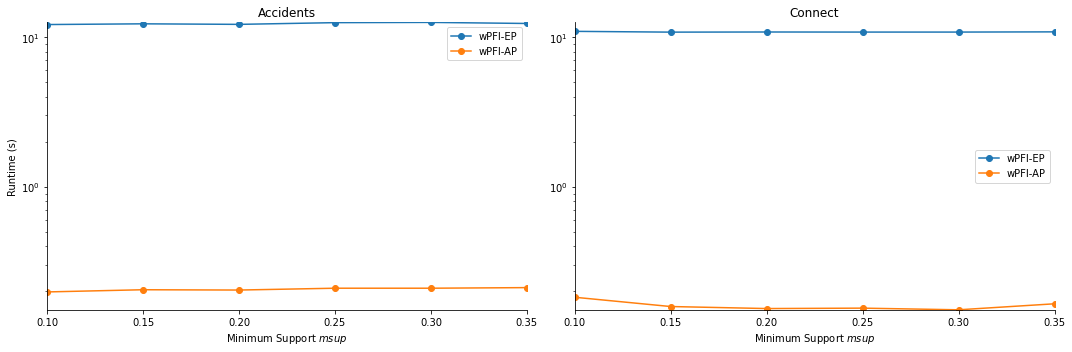

In [47]:
plot(dataset_dict, runtime_results, msup_values)

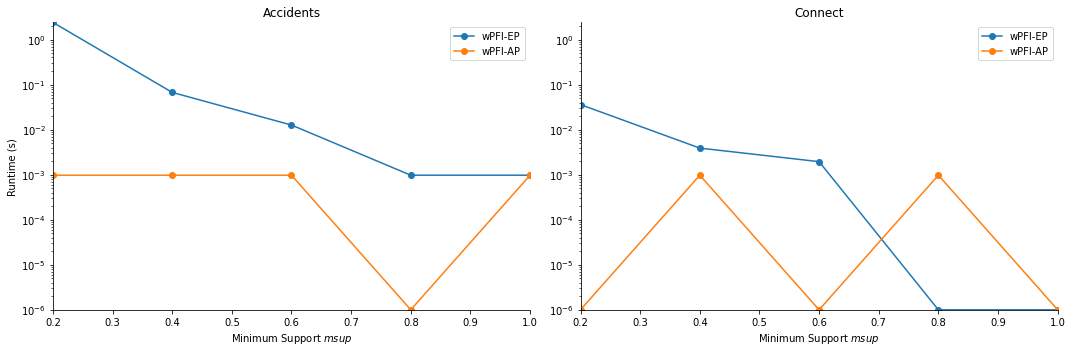

In [53]:
adjusted_runtimes = {
    'wPFI-EP': [max(rt, 1e-6) for rt in runtime_results_t['wPFI-EP']],
    'wPFI-AP': [max(rt, 1e-6) for rt in runtime_results_t['wPFI-AP']]
}

plot(dataset_dict, adjusted_runtimes, t_values)

VI. Summary

To sum up, with small dataset, 'Exact weighted probabilistic frequent itemset mining'(eWPFIM) algorithm returns more levels of itemsets mean that it has discovered not just individual items but also their combinations up to a certain length that occur frequently together. This can be very useful for understanding complex patterns within the data, but additional levels of itemsets may not always provide actionable insights or could represent redundant or obvious information that doesn't aid decision-making. Besides, higher-level itemsets may sometimes include noise, leading to overfitting, especially in uncertain databases where the presence of an item in a transaction can be probabilistic. Moreover, more levels usually require greater computational resources. In some cases, finding a balance between the depth of the itemsets and the computational cost is necessary, especially with very large datasets. The quality of the discovered itemsets is crucial. An algorithm that yields high-confidence, high-lift itemsets that are potentially useful for prediction or recommendations might be preferred even if it produces fewer levels of itemsets. It is especially right with the 'Approximate weighted probabilistic frequent itemset mining'(aWPFIM) algorithm. This one uses the support threshold(msup) to determine how frequently an itemset appears in the dataset, scaling factor(alpha) to adjust the influence of the weight in the support calculation, and probabilistic frequent threshold(t) to decide whether an itemset's probabilistic measure is sufficient for it to be considered frequent, unlike the eWPFIM algorithm, which only uses (t), so it seem to perform faster despite returning fewer levels of itemset. Undoubtedly, higher-level itemsets that meet high support and confidence thresholds can be very valuable, but if the goal is to identify simple and strong rules to inform immediate business decisions, fewer levels with very high support might be adequate and preferred.